<img src="http://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg"
     align="right"
     width="30%"
     alt="Dask logo\">

# Parallelize code with `dask.delayed`

### Sequential

In [18]:
import dask.delayed as delayed
from time import sleep

In [19]:
def add_one(i):
    sleep(1)
    return i + 1

In [20]:
def plus(x, y):
    sleep(1)
    return x + y

In [21]:
%%time
x = add_one(1)
y = add_one(2)
total = plus(x, y)

CPU times: user 2.71 ms, sys: 1.25 ms, total: 3.95 ms
Wall time: 3 s


### Parallelize

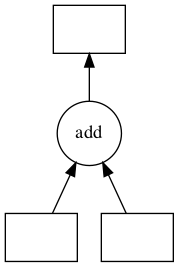

In [7]:
# By wrapping delayed, around a function, a Dask Delayed representation of the function is produced.
#Delayed objects are equivalent to a node in a DAG.
x = delayed((add_one)(1))
y = delayed((add_one)(2))
total = delayed((plus)(x, y))
total.visualize()

In [8]:
%%time
total.compute()

CPU times: user 2.88 ms, sys: 2.12 ms, total: 4.99 ms
Wall time: 4.63 ms


5

In [9]:
def multiply_two(x):
    sleep(1)
    return x * 2

#### Sequential 

In [25]:
%%time
data = [1, 3, 7, 12]
step1 = [add_one(i) for i in data]
step2 = [multiply_two(j) for j in step1]
total = sum(step2)
print(total)

54
CPU times: user 7.97 ms, sys: 2.88 ms, total: 10.9 ms
Wall time: 8.02 s


CPU times: user 3.58 ms, sys: 6.01 ms, total: 9.59 ms
Wall time: 467 ms


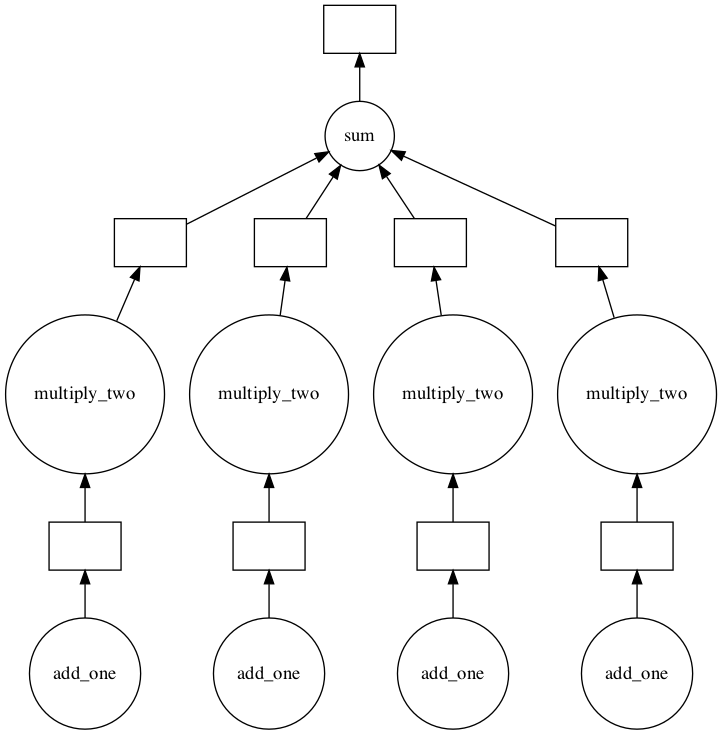

In [26]:
%%time

data = [1, 3, 7, 12]

step1 = [delayed(add_one)(i) for i in data]
step2 = [delayed(multiply_two)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

In [24]:
%%time
total.compute()

CPU times: user 4.97 ms, sys: 4.49 ms, total: 9.46 ms
Wall time: 2.01 s


54

In [12]:
def is_even(x):
    return not x % 2

### Sequential

In [27]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
%%time 
results = []

for x in data:
    if is_even(x):  # even
        y = multiply_two(x)
    else:          # odd
        y = add_one(x)
    results.append(y)
    
total = sum(results)

CPU times: user 10.1 ms, sys: 2.97 ms, total: 13.1 ms
Wall time: 10 s


### Parallel

In [30]:
%%time 
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(multiply_two)(x)
    else:          # odd
        y = delayed(add_one)(x)
    results.append(y)
    
total = delayed(sum)(results)

CPU times: user 1.15 ms, sys: 625 µs, total: 1.77 ms
Wall time: 1.31 ms


In [31]:
%%time 
total.compute()

CPU times: user 3.49 ms, sys: 2.44 ms, total: 5.94 ms
Wall time: 1.01 s


90

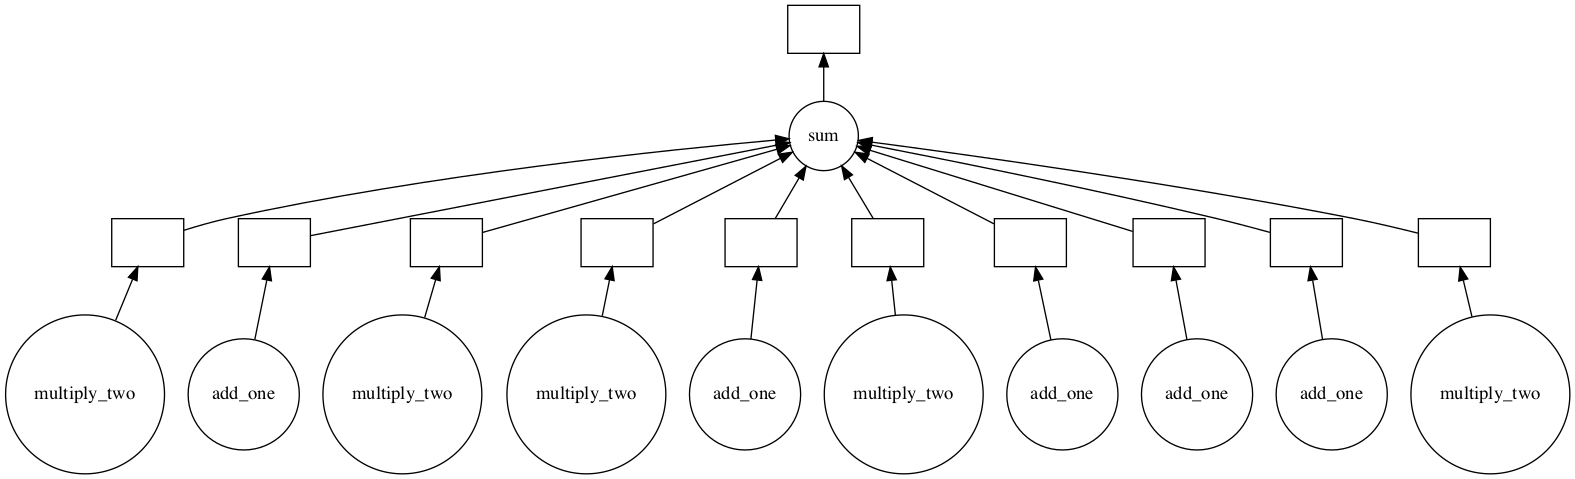

In [32]:
total.visualize()